<a href="https://colab.research.google.com/github/SyedUsama12/Deep-Learning1/blob/main/IMDB_Data_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
from keras.datasets import imdb

In [4]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [39]:
len(test_labels)


25000

In [26]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [27]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [30]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [34]:
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

In [35]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [40]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 68ms/step - loss: 0.5803 - accuracy: 0.7176 - val_loss: 0.3723 - val_accuracy: 0.8728
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3125 - accuracy: 0.9013 - val_loss: 0.3020 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2160 - accuracy: 0.9343 - val_loss: 0.3342 - val_accuracy: 0.8626
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1805 - accuracy: 0.9410 - val_loss: 0.3000 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1409 - accuracy: 0.9550 - val_loss: 0.3271 - val_accuracy: 0.8746
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1142 - accuracy: 0.9656 - val_loss: 0.3164 - val_accuracy: 0.8756
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0894 - accuracy: 0.9764 - val_loss: 0.3116 - val_accuracy: 0.8831
Epoch 8/20
30

In [49]:
history_dic=history.history
history_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

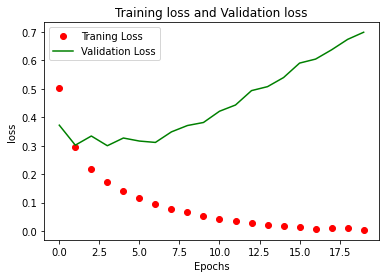

In [70]:
import matplotlib.pyplot as plt
loss = history_dic["loss"]
val_loss=history_dic["val_loss"]
epochs=range(20)
plt.plot(epochs,loss,"bo",label="Traning Loss",color="r")
plt.plot(epochs,val_loss,"b",label="Validation Loss",color ="g")
plt.title("Training loss and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()



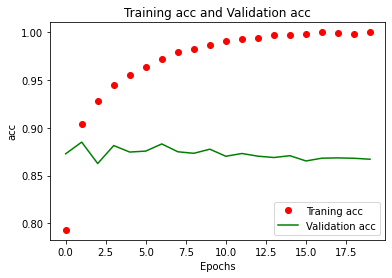

In [71]:
import matplotlib.pyplot as plt
acc = history_dic["accuracy"]
val_acc=history_dic["val_accuracy"]
epochs=range(20)
plt.plot(epochs,acc,"bo",label="Traning acc",color="r")
plt.plot(epochs,val_acc,"b",label="Validation acc",color ="g")
plt.title("Training acc and Validation acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


In [73]:
from keras import models
from keras import layers
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history1 = model1.fit(x_train,y_train,epochs=4,batch_size=512)


Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5531 - accuracy: 0.7306
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2611 - accuracy: 0.9124
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2002 - accuracy: 0.9299
Epoch 4/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1603 - accuracy: 0.9447


In [76]:
result=model1.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3081 - accuracy: 0.8790
